In [2]:
import cv2
import numpy as np
import os
from random import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
train_data = './leaf_train'
test_data = './leaf_test'

In [4]:
def one_host_label(img):
    label = img.split('0')[0]
    if label == 'l1nr':
        return np.array([1, 0])
    else:
        onl = np.array([0, 1])
    return onl

def train_data_with_label():
    train_images = []
    for i in os.listdir(train_data):
        path = os.path.join(train_data, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 128))
        train_images.append([np.array(img), one_host_label(i)])
    shuffle(train_images)    
    return train_images

def test_data_with_label():
    test_images = []
    for i in os.listdir(test_data):
        path = os.path.join(test_data, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 128))
        test_images.append([np.array(img), one_host_label(i)])
    shuffle(test_images)    
    return test_images

In [5]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

Using TensorFlow backend.


In [6]:
training_images = train_data_with_label()
testing_images = test_data_with_label()

train_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,128,1)
train_lbl_data = np.array([i[1] for i in training_images])
test_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,128,1)
test_lbl_data = np.array([i[1] for i in testing_images])

In [7]:
model = Sequential()

model.add(InputLayer(input_shape=[64, 128, 1]))
model.add(Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5, padding='same'))

model.add(Conv2D(filters=50, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5, padding='same'))

model.add(Conv2D(filters=80, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5, padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax'))

optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_img_data, y=train_lbl_data, epochs=30, batch_size=60)
model.summary()



Epoch 1/30
120/120 [==============================] - 0s 3ms/step - loss: 24.9883 - accuracy: 0.5417
Epoch 2/30
120/120 [==============================] - 0s 2ms/step - loss: 9.6954 - accuracy: 0.5333
Epoch 3/30
120/120 [==============================] - 0s 2ms/step - loss: 4.1213 - accuracy: 0.6667
Epoch 4/30
120/120 [==============================] - 0s 2ms/step - loss: 1.5005 - accuracy: 0.8000
Epoch 5/30
120/120 [==============================] - 0s 2ms/step - loss: 1.3215 - accuracy: 0.8417
Epoch 6/30
120/120 [==============================] - 0s 2ms/step - loss: 0.9170 - accuracy: 0.8333
Epoch 7/30
120/120 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9500
Epoch 8/30
120/120 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9917
Epoch 9/30
120/120 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9917
Epoch 10/30
120/120 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 1.0

In [13]:
from keras.models import load_model, save_model
save_model(model, 'leaf_classifier.h5')

In [18]:
load_model = load_model('./leaf_classifier.h5')

ValueError: You are trying to load a weight file containing 5 layers into a model with 0 layers

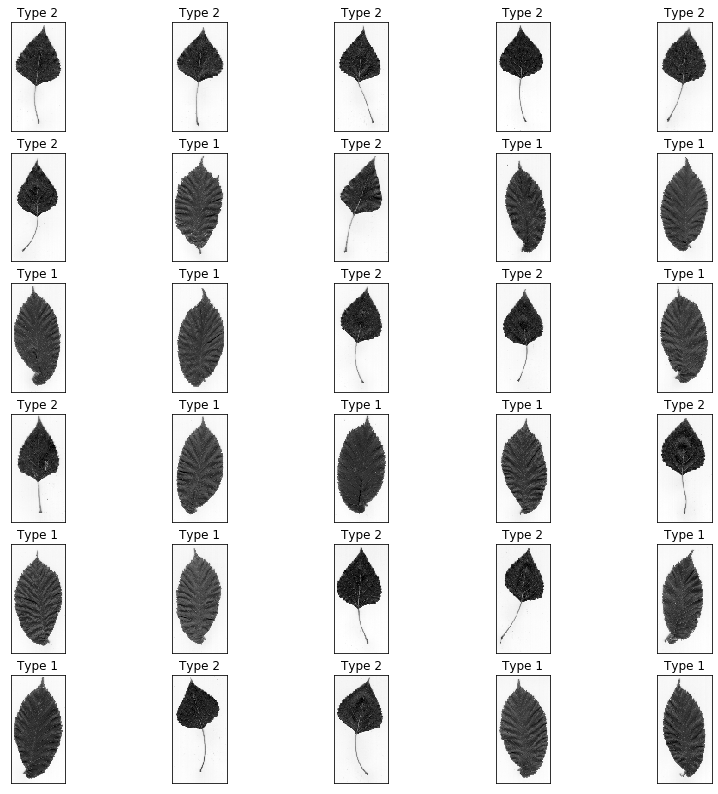

In [9]:
fig=plt.figure(figsize=(14, 14))

for cnt, data in enumerate(testing_images[0:30]):
    y = fig.add_subplot(6, 5, cnt+1)
    img = data[0]
    data = img.reshape(1, 64, 128, 1)
    model_out = model.predict([data])
    if np.argmax(model_out) == 0:
        str_label = 'Type 1'
    else:
        str_label = 'Type 2'
        
    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)